# ☸ Hyperparameter Tuning — Stationarity

*Finally we are here.* The following books will discuss "How can we select the best optimal parameters for the models. As you saw in the previous book ARIMA, there was ***a ton*** of different combinations to choose for p, d, and q.

So, finding the best combination was really a nasty stuff. In the subsequent books we will see different techniques to tune them.
<br>—<br>
Here it is for our parameter `d`. Which is the differencing parameter. Doing it saperately because it workes differently than `p` and `q`.

*(actually I have noticed that all `p`, `d`, and `q` are the flipped images for a character `p`! or `q` or `d`!!! they are equivalent! how cool!!!)*

## ➡ What is the "Stationarity"?

Loosely:
> *The distribution of the random variables in the time-series do not change over time.*

Which means, the *mean* and *variance* do not change if you go further in time or at any time point.

<img src="../images/mean-var.png" height=400 width=500>

- In the first image (left) we can see that there is the trend, and that means - if we take the mean in the window of some time steps, there will be ***different means*** per window. 

- And, similarly there will be ***difference in the variance*** as well.

###### 

## ➗ Any test to confirm stationarity?

Yeah! Indeed! There is the test called: **ADF Test: Augmented Dicky-Fuller Test**. 

There:
> **Null Hypothesis**: Time series is non-stationary <br> **Alternative Hypothesis**: Time series is stationary.

And if the `p < 0.05` then Null must go! You know the rest... don't you!

### A rough view of the process

<img src="../images/adf-test.png" height=400 width=500>

That is simple, isn't? <br>
You just have to keep checking for the stationarity until the time-series become stationary!

###### 

## Let's discuss the term "Stationary" formally.

Formally:
> There are ***2 types*** of stationarity: 
 <br> 
 <br>1. *Strong Sense Stationarity (SSS)*
 <br>2. *Weak Sense Stationarity (WSS)*

### `1.` Strong Sense Stationariy

*"The entire distribution does not change over time"*

Arg! That is hard statement! How is that possible for a time-series not to change over time! It is really *"constraintive"*!! *(is that a word?)*

<img src="../images/tao-steps.png" height=400 width=500>

Meaning, if you take a window of any arbitary time points and if you move $\tau$ steps into the future, no matter what $\tau$ is, the distribution **will not change**.

Generally, this SSS is not much useful practically. 

### `2.` Weak Sense Stationariy

*"The 1st order statistics (mean), 2nd order statistics (autocovariance) don't change over time."*

That kind of definition you **have already seen** under the "loosely" definition above! So that was the same!! 

> Here, the WSS looks at the 1st order and 2nd order statistics rather than full distribution (as in the SSS).

#### Wait... what is Auto-covariance?

Not a jargon, it is simple. It means, *"the covariance betwenn 2 variables from the same data series*.

If you recall, we usually find the *normal-covariance* which is just *covariance* for 2 different samples, right? But here, we are finding the covariance between 2 datapoints from the same sample. Thus, *like auto-regressive* in which the future value is dependent on the past values, this is *auto-covariance*.

The **auto means — *self***.
___
Covariance = ***unscaled correlation***! (good one man!)
- Autocovariance = 0: No relation
- Autocovariance > 0: Positive relation
- Autocovariance < 0: Negative relation

#### A small equation for autocovariance
*Nothig useful in operations but just to illustrate the point.*

## $$ acov(t_1, t_2) = f(t_1-t_2, 0) \text{ for all } t_1, t_2$$

Here, it says the autocovariance will be same *(zero)* if the difference of any t1 and t2 is same *(zero)*. That applies for ant t1 and t2 in the time series.

<img src="../images/acov.png" height=400 width=500>

$cov(Y_{12}, Y_{15}) == cov(Y_{22}, Y_{25}) == cov(Y_{200}, Y_{203})$ <br>
Note there that, the ***step*** is same between the time points. Meaning 15-12 = 3 and that differece 3 should be consistant.

> *Relationship between points in the same time-series remains constant no matter where we look, as long as they are the same distance apart.*

### 🤔 Why is stationarity useful?

- Because if the time-series is not stationary, they we will **not be able to fit the single model** to forecast. 
- We will have to **use different models** for each point in time, which is not intuitive.
- Why? Because say $y_1 = 0.443 y_2$ is the model that we have learnt, but **that relationship might not hold** for other data points!
- We often like to **compute statistics** from the time-series. If time-seris is changing over time, then **it makes no sense** to refer those mean and variance!!

> ⚠ **Skipped the points above?** Just Don't!! Those are the prime reasons why should we use stationarity in the model. Read 'em!

# See,
Literally the thing that we are discussing is ***non-important*** to the practical things that we are gonna encounter. It is just to build the inituition. Only thing to understand from this notebook is the **loosely** definition and the ***rough idea*** with the test applied.

# 

##  👨‍💻 Can we have some code please?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (20, 10)

# for the dickey fuller test
from statsmodels.tsa.stattools import adfuller

In [3]:
# loading the data in
df = pd.read_csv("../data/airline_passengers.csv", index_col=0, parse_dates=True)
df.index.freq = "MS"
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


The data looks like this as always...

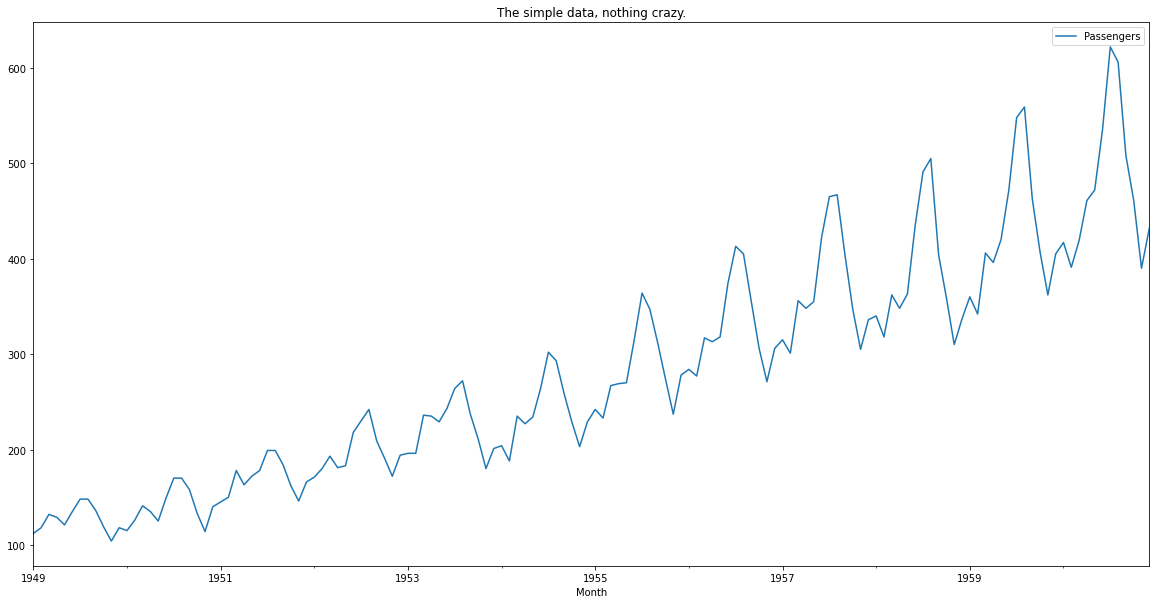

In [5]:
df.plot()
plt.title("The simple data, nothing crazy.");

#### Is that "stationary"?
I guess no... but *guess* doesn't work right? Let's test with ADF test.

In [6]:
adfuller(df)

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

That returns:

<img src="../images/adfuller.png" height=400 width=500>

Thus, we are interested in `adf` and `pvalue`. 

In [9]:
def is_stationary(data):
    result = adfuller(data)
    t_stat = result[0]
    p_value = result[1]
    
    # H0: Is non-stationary
    # H1: Is stationary
    if p_value < 0.05:
        return f"P: {p_value}\nT: {t_stat}\nResult: Stationary"
    return f"P: {p_value}\nT: {t_stat}\nResult: Non-Stationary"

In [11]:
print(is_stationary(df))

P: 0.9918802434376409
T: 0.8153688792060423
Result: Non-Stationary


#### What-if I log the data?

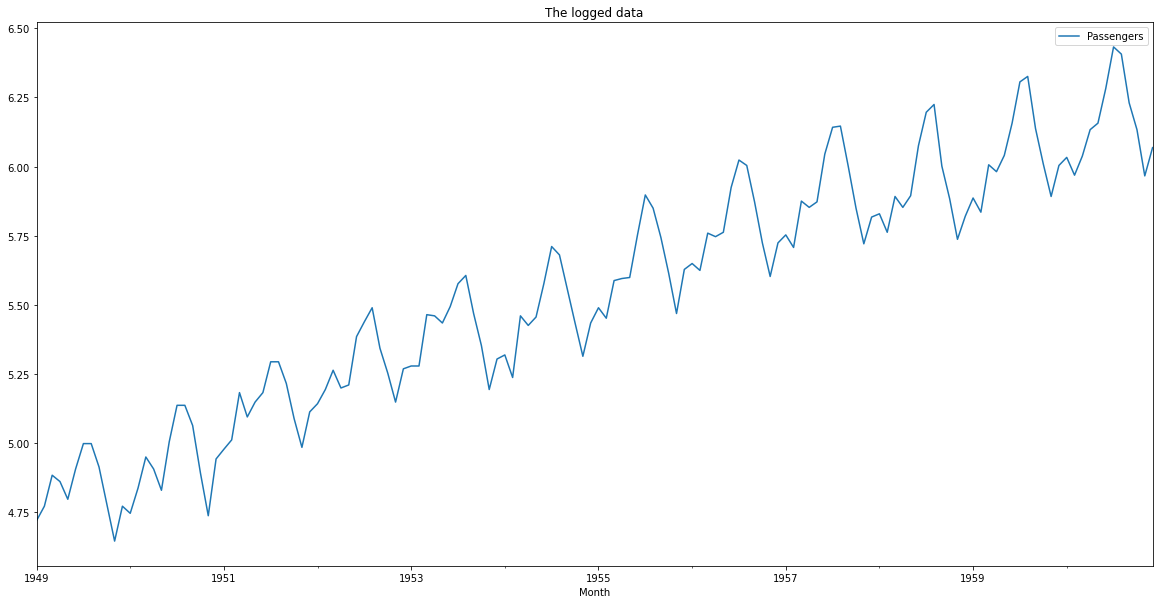

In [14]:
df.apply(np.log).plot()
plt.title("The logged data");

In [16]:
print(is_stationary(df.apply(np.log)))

P: 0.4223667747703857
T: -1.7170170891069714
Result: Non-Stationary


That is non stationary as well. *Because*, see that we have just transformed it. The trend is still there!

#### What-if I difference it?

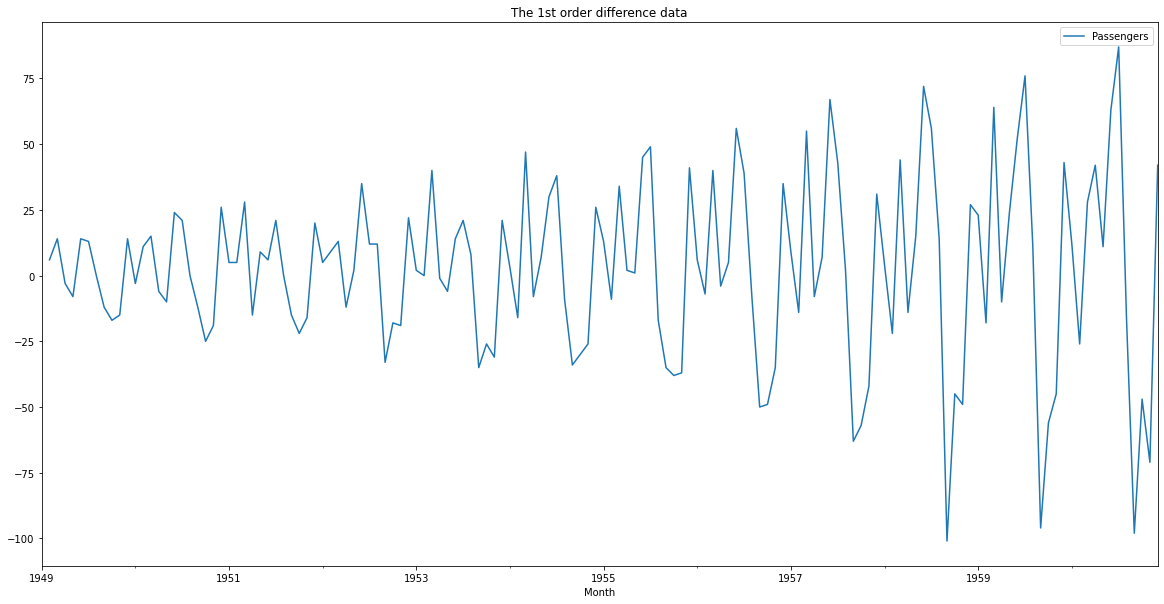

In [17]:
df.diff().plot()
plt.title("The 1st order difference data");

The amplitude is getting larger... the variance is getting changed... so **it should not be the stationary**.

In [20]:
# .dropna because diff will make first few NaN 
print(is_stationary(df.diff().dropna()))

P: 0.05421329028382711
T: -2.8292668241699874
Result: Non-Stationary


Great, it is Non-Stationary still. And see ***p value is much closer*** to `0.05`! If we would have kept the critical region to something higher like `0.1` then we would have said that it is **stationary**!

#### What-if I log difference it?

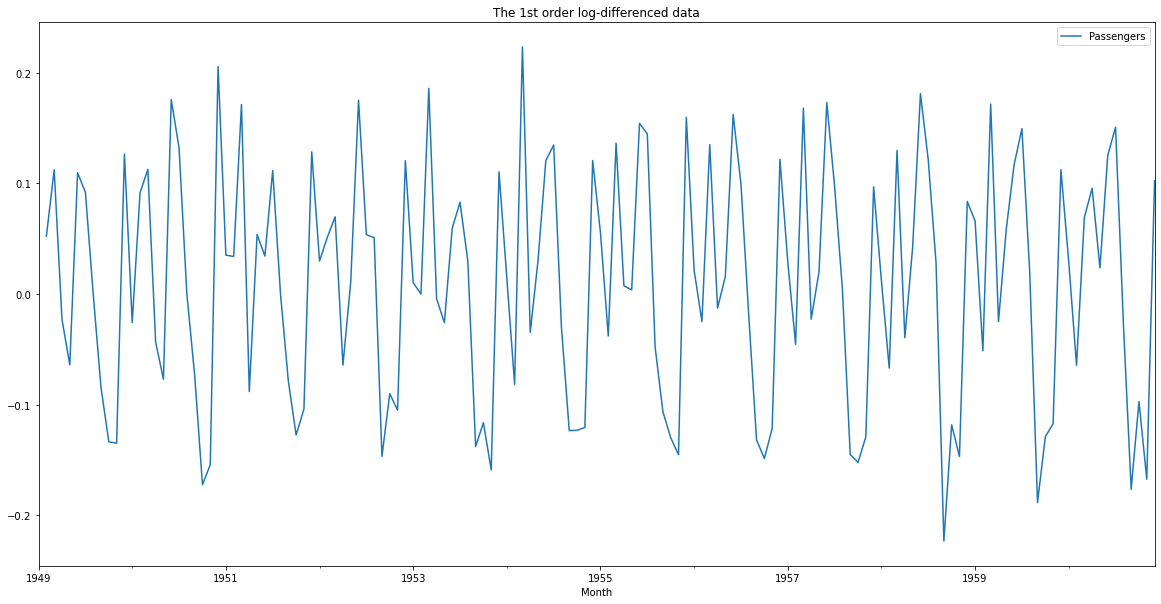

In [21]:
df.apply(np.log).diff().plot()
plt.title("The 1st order log-differenced data");

Looks much stationary! Let's see... I mean **it should be stationary**.

In [23]:
# .dropna because diff will make first few NaN 
print(is_stationary(df.apply(np.log).diff().dropna()))

P: 0.0711205481508568
T: -2.717130598388145
Result: Non-Stationary


**Oh!!** This one looked promissing but it is non-stationary! Man! See? how the tests are helpful?

And even, the P-value is larger than that in simple differenced data!!!

#### If I make really stationary data... then?

In [24]:
rand_data = np.random.randn(100)

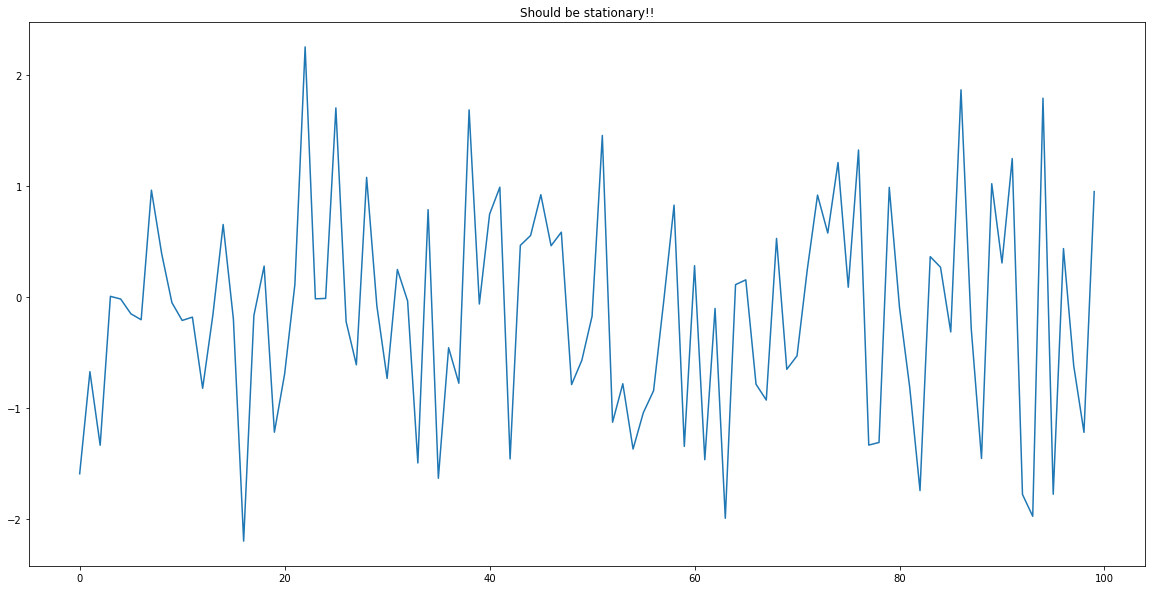

In [26]:
plt.plot(rand_data)
plt.title("Should be stationary!!");

In [27]:
print(is_stationary(rand_data))

P: 1.2788527283400642e-19
T: -10.883255964695305
Result: Stationary


It is!!

In [39]:
rand_data = np.random.gamma(1, 1, 100)

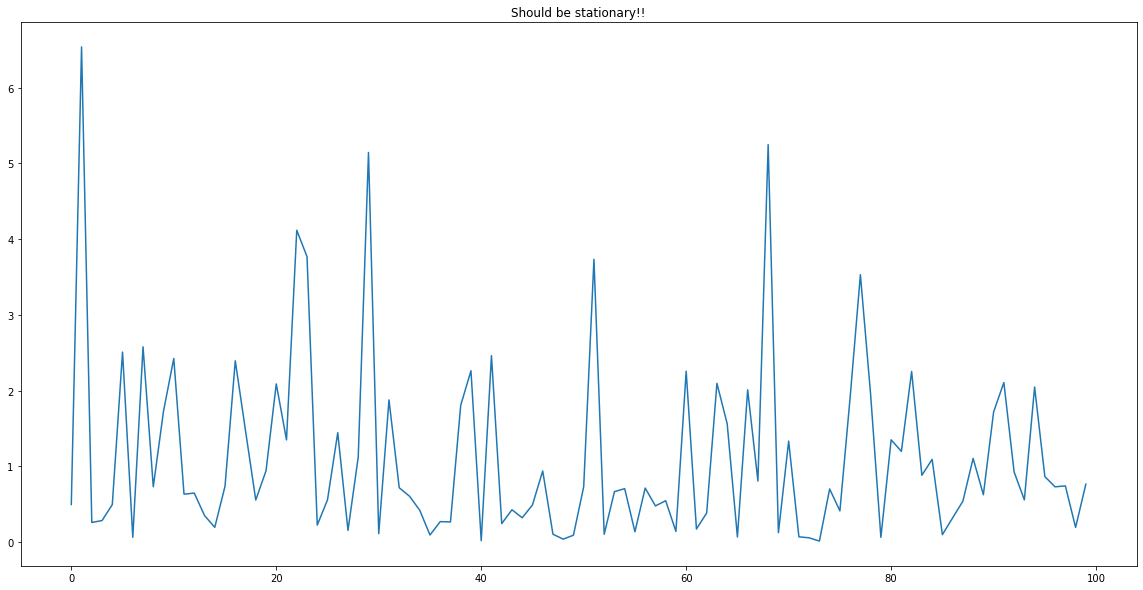

In [40]:
plt.plot(rand_data)
plt.title("Should be stationary!!");

In [41]:
print(is_stationary(rand_data))

P: 1.631289264904589e-18
T: -10.428776613561995
Result: Stationary


I don't know much about gamma... but there is a strong evidence that it is **stationary**.


# 

## How about the stocks? 
*Do they become stationary... really?*

In [44]:
stocks = pd.read_csv("../data/sp500_close.csv", index_col=0)

In [48]:
google = stocks["GOOGL"].dropna()

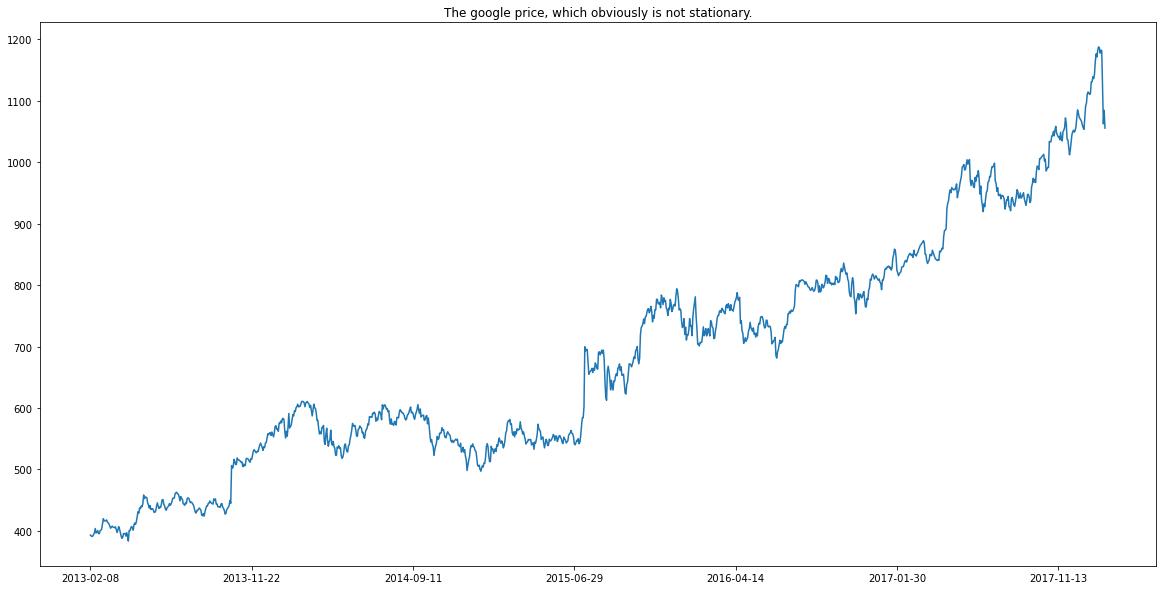

In [52]:
google.plot()
plt.title("The google price, which obviously is not stationary.");

In [53]:
print(is_stationary(google))

P: 0.8852456194547816
T: -0.5338222563870942
Result: Non-Stationary


#### Diffed Google?

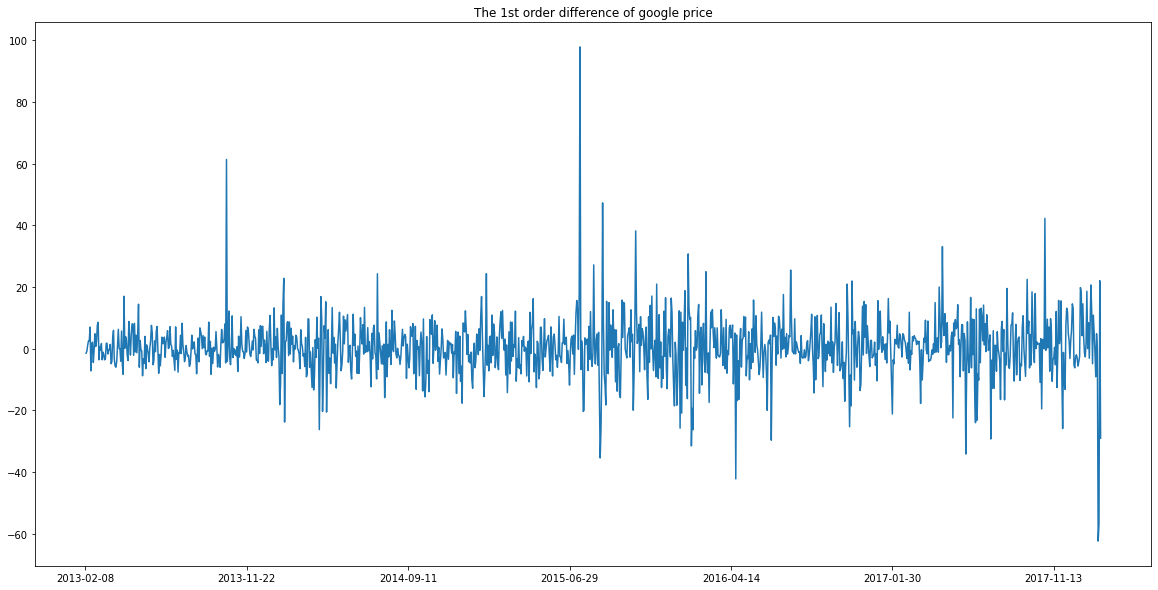

In [55]:
google.diff().plot()
plt.title("The 1st order difference of google price");

In [56]:
print(is_stationary(google.diff().dropna()))

P: 0.0
T: -33.229201669452024
Result: Stationary


It is guys! The differencing does make the stocks stationary! And there is **much strong** evidence!

#### Logged Google?

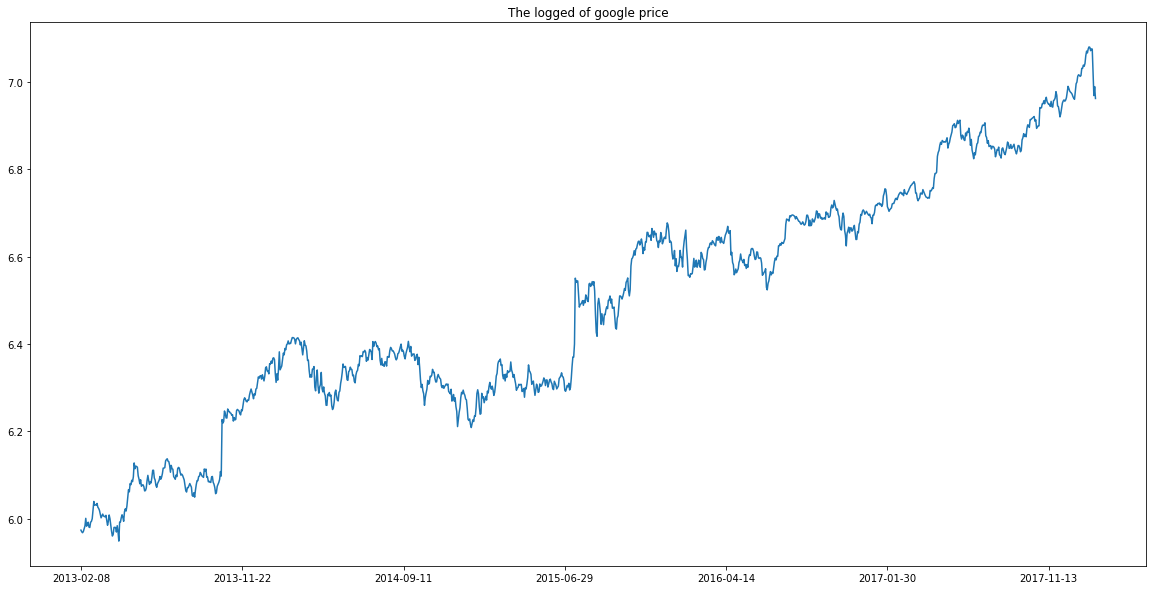

In [57]:
google.apply(np.log).plot()
plt.title("The logged of google price");

In [58]:
print(is_stationary(google.apply(np.log)))

P: 0.7163171406658895
T: -1.0968734112285103
Result: Non-Stationary


Obviously!

# 

# Great stuff, I know.
Let's meet in the next notebook where we will discuss some very anticipated stuff. **ACF**.